In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Preprocessing
1. Load file and append each row to list `all_data`
2. Load the list into a pandas dataframe `df`
3. Drop the first and fifth column (the first is an index, the fifth is equal for all but 1 row)
4. Rename "cp" to 1 and "im" to 0 for binary classification, discard the rest of the rows

In [2]:
all_data = []
with open("./data/ecoli.data", "r") as file:
    [all_data.append(line.split()) for line in file]

df = pd.DataFrame(all_data)
df = df.drop(df.columns[[0, 4]], axis=1)
df.columns = np.arange(len(df.columns))
df = df.rename(columns={6: "Class"})

df.loc[df["Class"] == "cp", "Class"] = 1
df.loc[df["Class"] == "im", "Class"] = 0
df = df.apply(lambda x: pd.to_numeric(x, errors="coerce")).dropna()
print(df)

        0     1     2     3     4     5  Class
0    0.49  0.29  0.48  0.56  0.24  0.35    1.0
1    0.07  0.40  0.48  0.54  0.35  0.44    1.0
2    0.56  0.40  0.48  0.49  0.37  0.46    1.0
3    0.59  0.49  0.48  0.52  0.45  0.36    1.0
4    0.23  0.32  0.48  0.55  0.25  0.35    1.0
..    ...   ...   ...   ...   ...   ...    ...
215  0.10  0.49  0.48  0.41  0.67  0.21    0.0
216  0.30  0.51  0.48  0.42  0.61  0.34    0.0
217  0.61  0.47  0.48  0.00  0.80  0.32    0.0
218  0.63  0.75  0.48  0.64  0.73  0.66    0.0
219  0.71  0.52  0.48  0.64  1.00  0.99    0.0

[220 rows x 7 columns]


### Train / test split

In [4]:
df_training_data = df.sample(frac=0.7, random_state=200)
df_test_data = df.drop(df_training_data.index).sample(frac=1.0, random_state=200)
training_data, test_data = df_training_data.to_numpy().tolist(), df_test_data.to_numpy().tolist()

X_train = torch.Tensor([i[0:6] for i in training_data])
Y_train = torch.Tensor([i[6] for i in training_data])

X_test = torch.Tensor([i[0:6] for i in test_data])
Y_test = torch.Tensor([i[6] for i in test_data])

### Create model

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 10)
        self.fc2 = nn.Linear(10, 1)
        # self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        # x = self.fc3(x)
        # x = torch.sigmoid(x)
        return x

### Train model

In [25]:
learning_rate = 0.001
epochs = 100

In [26]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
training_loss = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    training_loss.append(loss.item())

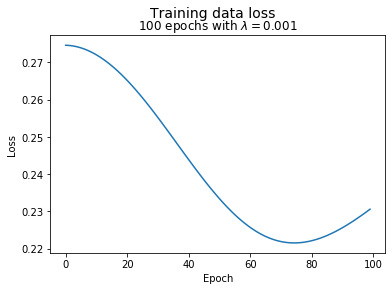

In [27]:
plt.plot(training_loss)
plt.suptitle("Training data loss", fontsize=14)
plt.title(f"{epochs} epochs with " + r"$\lambda =$" + f"{learning_rate}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.savefig(f"./images/train_loss_{epochs}epochs_{learning_rate}lambda.jpeg")
plt.show()

### Test model

In [1]:
def test(model, test_loader, device='cpu'):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

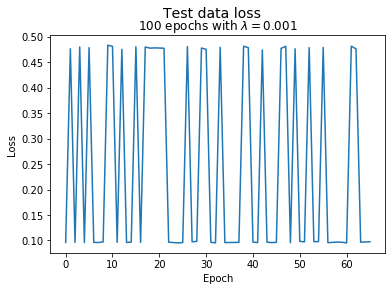

In [11]:
plt.plot(test_loss)
plt.suptitle("Test data loss", fontsize=14)
plt.title(f"{epochs} epochs with " + r"$\lambda =$" + f"{learning_rate}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939,

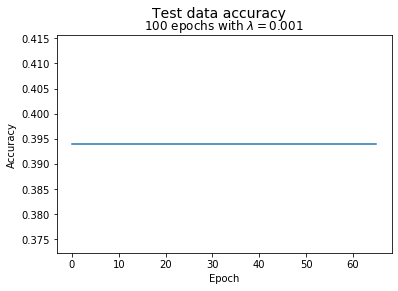

In [14]:
plt.plot(np.arange(len(accuracies)), accuracies)
plt.suptitle("Test data accuracy", fontsize=14)
plt.title(f"{epochs} epochs with " + r"$\lambda =$" + f"{learning_rate}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()